In [6]:
from __future__ import division, print_function, absolute_import
import logging
import time
import tensorflow as tf
import os
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
from config import pathDict
from conv_net.train import Train
from conv_net.test import Test
from data_transformation.data_prep import get_intersecting_images_pin, DumpBatches
from plot import Plot
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


which_net = 'resnet'
batch_prepare = True
train = True
test = True

INPUT the RUN NAME: Options : ("A new run name" or "Any Previous Run Name"
 WHICH_RUN = new_test
INPUT: Image-type OPTIONS: (assessor, assessor_code, aerial, overlayed, aerial_cropped, streetside and ensemble 
 IMAGE_TYPE = aerial_cropped


## PREPARE/DUMP BATCHES:

In [2]:
start_time = time.time()

max_batches = None

if batch_prepare:
    start_time = time.time()
    
    cmn_land_pins, cmn_house_pins = get_intersecting_images_pin(is_assessor=False, is_aerial=False,
                                                                is_streetside=False, is_overlayed=False,
                                                                is_aerial_cropped=True, equal_proportion=True)
    print(len(cmn_land_pins), len(cmn_house_pins))
    
    tr_batch_size = 128
    ts_batch_size = (len(cmn_land_pins) + len(cmn_house_pins)) // 10
    cv_batch_size = (len(cmn_land_pins) + len(cmn_house_pins)) // 10
    
    params = dict(
            image_type='aerial_cropped',
            img_in_shape=[400, 400, 3],
            img_out_shape=[224, 224, 3],
            img_resize_shape=[128, 128, 3],
            img_crop_shape=[128, 128, 3],
            tr_batch_size = tr_batch_size,
            cv_batch_size = cv_batch_size,
            ts_batch_size = ts_batch_size,
            enable_rotation=True,
            shuffle_seed=881,
            get_stats=True,
            max_batches=max_batches)
    
    obj_cb = DumpBatches(params)
    obj_cb.dumpStratifiedBatches_balanced_class(cmn_land_pins, cmn_house_pins, is_cvalid_test=False)

print ('--------------- %s seconds ------------------'%(time.time() - start_time))


956 956
1912 1912 1912 1912 1912=== 13
--------------- 94.71021866798401 seconds ------------------


## TEST MODEL:

In [2]:
which_data = 'test'
tsoj = Test(params=dict(pprocessor_inp_img_shape=[224,224,3],
                        pprocessor_inp_crop_shape=[],
                        model_inp_img_shape=[224, 224, 3]),
                    device_type = 'gpu',
                    which_net='resnet')
fnl_tst_metric_stack = tsoj.run(use_checkpoint_for_run='sam_new',
                                use_checkpoint_for_imageType='aerial_cropped',
                                optional_batch_name=None,
                                which_checkpoint='all',
                                which_data=which_data,
                                dump_stats=True)

Test Graphs: RESNET
Learning Rate: Initial:  0.0005
Batch path C:\Users\newline\Documents\ImageClassification\data\batch_data\new_test\aerial_cropped, batch_names: ['batch_0', 'batch_1', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9']
Test Graphs: RESNET
Learning Rate: Initial:  0.0005
Batch path C:\Users\newline\Documents\ImageClassification\data\batch_data\new_test\aerial_cropped, batch_names: ['batch_0', 'batch_1', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9']
Test Graphs: RESNET
Learning Rate: Initial:  0.0005
Batch path C:\Users\newline\Documents\ImageClassification\data\batch_data\new_test\aerial_cropped, batch_names: ['batch_0', 'batch_1', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9']
Test Graphs: RESNET
Learning Ra

## GET PREDICTIONS

In [8]:
prediction_outcomes_path = os.path.join(pathDict['statistics_path'], 'prediction_stats', 'test_pred_outcomes.csv')
prediction_metrics_path = os.path.join(pathDict['statistics_path'], 'prediction_stats', 'test_pred_metrics.csv')
prediction_outcomes = pd.read_csv(prediction_outcomes_path)
prediction_metrics = pd.read_csv(prediction_metrics_path)
pd.concat([prediction_metrics.head(), prediction_metrics.tail()])

,checkpoint,dataset_type,test_loss,test_acc,test_precsion,test_recall
0,epoch_7_batch_89,batch_0,0.209,0.922,0.886,0.969
1,epoch_7_batch_89,batch_1,0.169,0.922,0.897,0.953
2,epoch_7_batch_89,batch_10,0.165,0.922,0.897,0.953
3,epoch_7_batch_89,batch_11,0.261,0.898,0.849,0.969
4,epoch_7_batch_89,batch_12,0.289,0.883,0.866,0.906
121,epoch_30_batch_9,batch_5,0.146,0.953,0.953,0.953
122,epoch_30_batch_9,batch_6,0.121,0.953,0.939,0.969
123,epoch_30_batch_9,batch_7,0.131,0.953,0.939,0.969
124,epoch_30_batch_9,batch_8,0.105,0.969,0.955,0.984
125,epoch_30_batch_9,batch_9,0.128,0.945,0.913,0.984


In [9]:
np.unique(prediction_metrics["checkpoint"])

array(['epoch_29_batch_109', 'epoch_29_batch_116', 'epoch_29_batch_89',
       'epoch_29_batch_99', 'epoch_30_batch_9', 'epoch_7_batch_109',
       'epoch_7_batch_116', 'epoch_7_batch_89', 'epoch_7_batch_99'], dtype=object)

In [17]:
prediction_metrics[prediction_metrics['checkpoint'] == 'epoch_30_batch_9']

,checkpoint,dataset_type,test_loss,test_acc,test_precsion,test_recall
112,epoch_30_batch_9,batch_0,0.178,0.930,0.887,0.984
113,epoch_30_batch_9,batch_1,0.138,0.930,0.899,0.969
114,epoch_30_batch_9,batch_10,0.130,0.945,0.925,0.969
115,epoch_30_batch_9,batch_11,0.213,0.906,0.871,0.953
116,epoch_30_batch_9,batch_12,0.244,0.914,0.908,0.922
117,epoch_30_batch_9,batch_13,0.160,0.948,0.924,0.976
118,epoch_30_batch_9,batch_2,0.160,0.938,0.924,0.953
119,epoch_30_batch_9,batch_3,0.089,0.961,0.954,0.969
120,epoch_30_batch_9,batch_4,0.123,0.969,0.955,0.984
121,epoch_30_batch_9,batch_5,0.146,0.953,0.953,0.953


In [40]:
from conv_net.utils import Score

def graph_for_checkpoint(checlpoint_num):
    predictions = prediction_outcomes[prediction_outcomes['checkpoint'] == checlpoint_num]
    accuracy = Score().accuracy(y_true=predictions["true_label"], y_pred=predictions["pred_label"])
    precision = Score().precision(y_true=predictions["true_label"], y_pred=predictions["pred_label"], reverse=True)
    recall = Score().recall(y_true=predictions["true_label"], y_pred=predictions["pred_label"], reverse=True)
    auc = Score().auc(y_true=predictions["true_label"], y_pred=predictions["pred_label"])
    print (accuracy, precision, recall, auc)

    # GET Precision, Recall and Accuracy for several Theshold
    acc_arr, prscn_arr, rcall_arr, thresholds = Score().prec_rec_acc_for_thresh(
        y_true=np.array(predictions["true_label"]), y_pred=np.array(predictions["pred_label"]), 
        y_pred_prob=np.array(predictions["pred_prob"]), num_thres=100, reverse=True
    )
    
    return acc_arr, prscn_arr, rcall_arr, thresholds

In [41]:
checkpoint_arr = ['epoch_29_batch_109', 'epoch_29_batch_116', 'epoch_29_batch_89', 'epoch_29_batch_99', 
                  'epoch_30_batch_9', 'epoch_7_batch_109', 'epoch_7_batch_116', 'epoch_7_batch_89', 
                  'epoch_7_batch_99']

## PLOTS

0.942468619247 0.921314741036 0.967573221757 0.942468619247
0.942991631799 0.9222333001 0.967573221757 0.942991631799
0.945083682008 0.925925925926 0.967573221757 0.945083682008
0.942991631799 0.9222333001 0.967573221757 0.942991631799
0.944037656904 0.924075924076 0.967573221757 0.944037656904
0.931485355649 0.913741223671 0.952928870293 0.931485355649
0.93410041841 0.919191919192 0.951882845188 0.93410041841
0.928347280335 0.905847373637 0.956066945607 0.928347280335
0.93410041841 0.910079051383 0.963389121339 0.93410041841


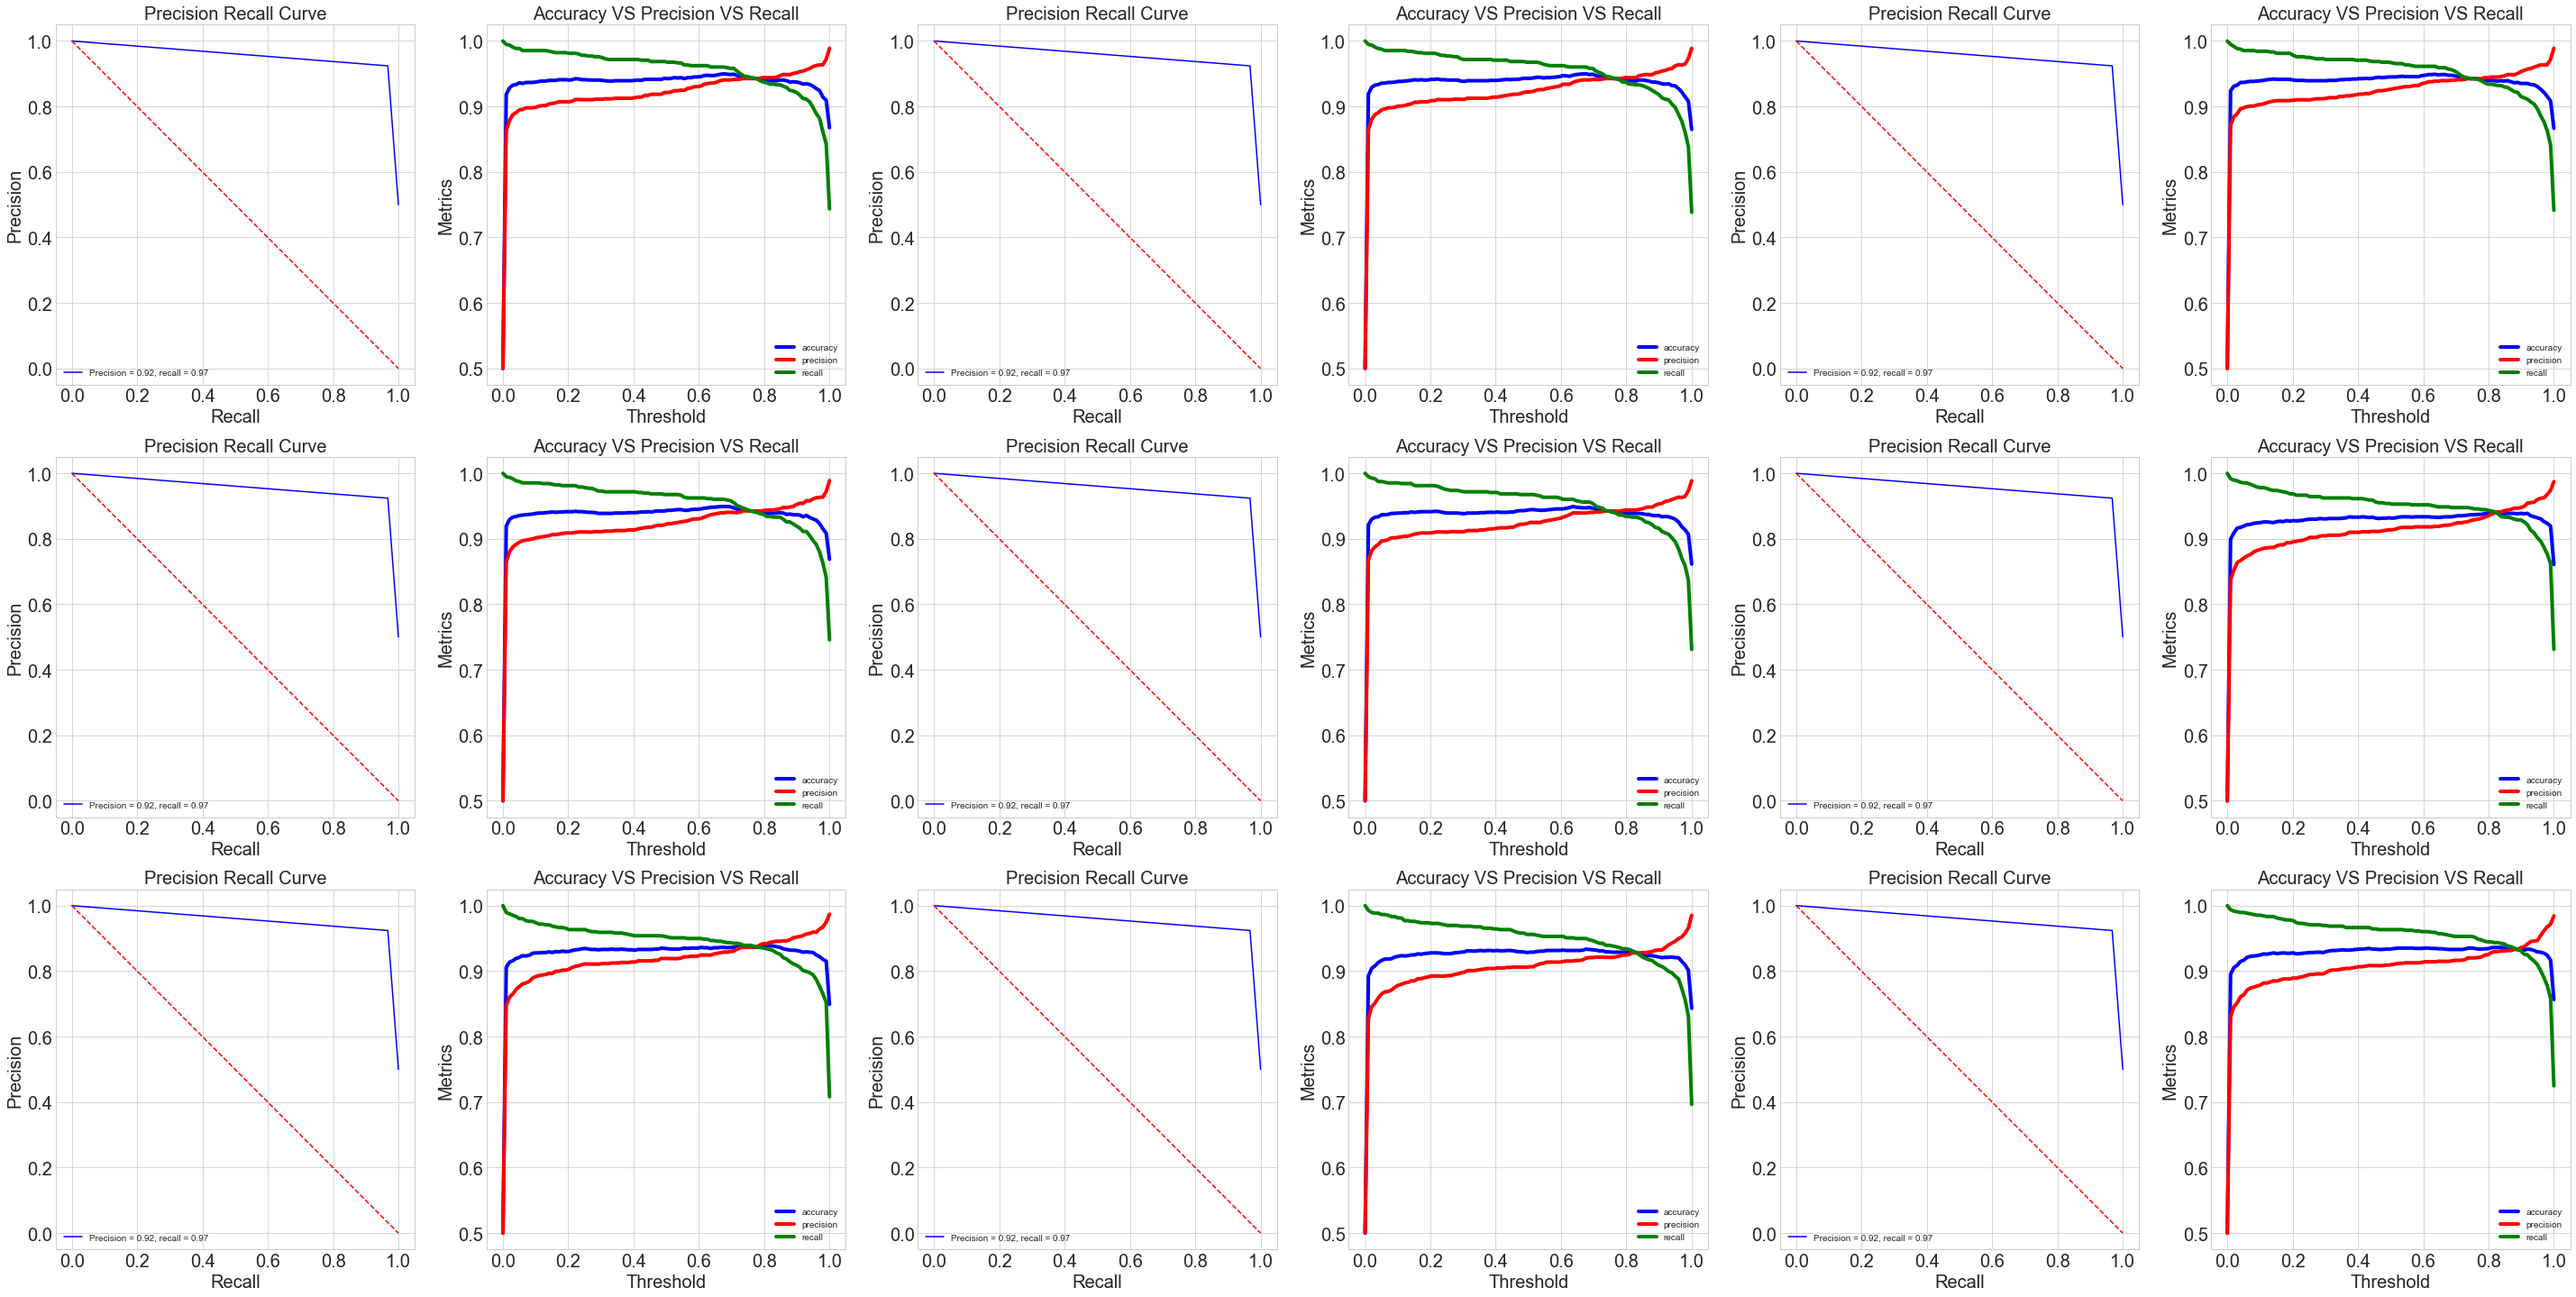

In [42]:
from plot import Plot
obj_plt = Plot(3,6, (50,25))

for chk in checkpoint_arr:
    acc_arr, prscn_arr, rcall_arr, thresholds = graph_for_checkpoint(chk)
    obj_plt.vizualize(data=predictions[["true_label", "pred_label"]], 
                     colX="true_label", colY="pred_label", 
                     label_col=None, viz_type="pr_curve", 
                     params={"title":"Precision Recall Curve", 'reverse':True})
    obj_plt.vizualize(data=pd.DataFrame({'threshold': thresholds, 'accuracy':acc_arr, 'precision':prscn_arr, 'recall':rcall_arr}), 
                     colX='threshold', colY=None, label_col=None, viz_type="line",
                      params={"title":"Accuracy VS Precision VS Recall", 'xlabel':"Threshold", "ylabel":"Metrics"})  
    